In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
import koreanize_matplotlib

In [8]:
df=pd.read_csv('./LOCAL_PEOPLE_GU_2023.csv',encoding='cp949')  

In [9]:
df.head()

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20230101,0,11110,211983.7554,5256.3035,2985.2135,5585.3388,10029.3603,10311.7458,8131.2590,...,9989.7436,7420.0172,7877.9124,7403.7900,8433.4562,7401.3378,7984.9511,6476.2241,5176.6241,14109.9869
1,20230101,0,11140,161323.9236,5093.4474,1916.9721,2969.1968,6355.1874,7354.2686,6991.7530,...,8413.7271,6993.0188,7613.7788,5851.6730,5895.7675,5054.8313,5262.5790,4762.5191,3330.8358,9806.8907
2,20230101,0,11170,254936.4270,7214.2899,3557.2729,5090.9204,8721.3070,11030.7512,12265.7970,...,11856.9406,11857.7227,13386.7419,10292.2066,10609.6364,9299.7363,8951.3212,7662.5905,5762.7546,15375.7578
3,20230101,0,11200,303352.3618,10735.8404,4511.9900,6409.0787,9987.8283,12091.6443,11337.1432,...,12123.5732,12338.8198,15555.4774,12236.0617,12272.9808,11141.5024,11594.7859,9793.4866,7480.2283,19484.7348
4,20230101,0,11215,359375.3891,10808.4535,5769.8457,10861.3001,15557.6316,16801.7747,14391.7039,...,17918.7066,14837.4148,15334.9660,13328.4735,14172.6260,12648.3202,13913.7108,11250.0675,8604.0436,19799.9595


In [10]:
df.shape

(219000, 32)

In [11]:
df2=pd.read_csv('./서울시 상권분석서비스(점포-자치구) (1).csv',encoding='cp949')    

In [19]:
df2.tail()

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
59720,20191,11110,종로구,CS100005,제과점,157.0,218.0,9.6,21.0,4.6,10.0,61.0
59721,20191,11110,종로구,CS100004,양식음식점,436.0,479.0,4.0,19.0,2.9,14.0,43.0
59722,20191,11110,종로구,CS100003,일식음식점,232.0,283.0,7.8,22.0,3.2,9.0,51.0
59723,20191,11110,종로구,CS100002,중식음식점,186.0,209.0,6.7,14.0,6.2,13.0,23.0
59724,20191,11110,종로구,CS100001,한식음식점,2508.0,2774.0,3.7,103.0,4.9,136.0,266.0


In [16]:
code_list=list(map(int,df2['자치구_코드'].unique()))
code_list   

[11740,
 11710,
 11680,
 11650,
 11620,
 11590,
 11560,
 11545,
 11530,
 11500,
 11470,
 11440,
 11410,
 11380,
 11350,
 11320,
 11305,
 11290,
 11260,
 11230,
 11215,
 11200,
 11170,
 11140,
 11110]

In [20]:
# 자치구 코드와	'자치구_코드_명' 을 매칭하기 위한 딕셔너리 생성       

code_dict = {  }
for i in range(len(df2)):
    code_dict[df2['자치구_코드'][i]] = df2['자치구_코드_명'][i] 

code_dict   

{np.int64(11740): '강동구',
 np.int64(11710): '송파구',
 np.int64(11680): '강남구',
 np.int64(11650): '서초구',
 np.int64(11620): '관악구',
 np.int64(11590): '동작구',
 np.int64(11560): '영등포구',
 np.int64(11545): '금천구',
 np.int64(11530): '구로구',
 np.int64(11500): '강서구',
 np.int64(11470): '양천구',
 np.int64(11440): '마포구',
 np.int64(11410): '서대문구',
 np.int64(11380): '은평구',
 np.int64(11350): '노원구',
 np.int64(11320): '도봉구',
 np.int64(11305): '강북구',
 np.int64(11290): '성북구',
 np.int64(11260): '중랑구',
 np.int64(11230): '동대문구',
 np.int64(11215): '광진구',
 np.int64(11200): '성동구',
 np.int64(11170): '용산구',
 np.int64(11140): '중구',
 np.int64(11110): '종로구'}

In [21]:
# df에 자치구코드 활용해서 자치구명 추가하기    
df['자치구코드'] = df['자치구코드'].astype(int) # 자치구코드를 int형으로 변환       
df['자치구명'] = df['자치구코드'].map(code_dict) # 자치구코드를 활용해서 자치구명 추가하기  
df.head(10) 

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,자치구명
0,20230101,0,11110,211983.7554,5256.3035,2985.2135,5585.3388,10029.3603,10311.7458,8131.2590,...,7420.0172,7877.9124,7403.7900,8433.4562,7401.3378,7984.9511,6476.2241,5176.6241,14109.9869,종로구
1,20230101,0,11140,161323.9236,5093.4474,1916.9721,2969.1968,6355.1874,7354.2686,6991.7530,...,6993.0188,7613.7788,5851.6730,5895.7675,5054.8313,5262.5790,4762.5191,3330.8358,9806.8907,중구
2,20230101,0,11170,254936.4270,7214.2899,3557.2729,5090.9204,8721.3070,11030.7512,12265.7970,...,11857.7227,13386.7419,10292.2066,10609.6364,9299.7363,8951.3212,7662.5905,5762.7546,15375.7578,용산구
3,20230101,0,11200,303352.3618,10735.8404,4511.9900,6409.0787,9987.8283,12091.6443,11337.1432,...,12338.8198,15555.4774,12236.0617,12272.9808,11141.5024,11594.7859,9793.4866,7480.2283,19484.7348,성동구
4,20230101,0,11215,359375.3891,10808.4535,5769.8457,10861.3001,15557.6316,16801.7747,14391.7039,...,14837.4148,15334.9660,13328.4735,14172.6260,12648.3202,13913.7108,11250.0675,8604.0436,19799.9595,광진구
5,20230101,0,11230,329633.6181,10384.0044,5142.8225,7099.3940,13364.2222,13848.7363,11223.1536,...,11405.4372,13811.8047,11876.9064,12507.5373,11182.2373,11767.0039,10491.5128,8704.5970,24177.4181,동대문구
6,20230101,0,11260,369534.7150,13221.5412,6384.8807,7722.5623,9406.3719,13123.3334,13563.1778,...,13690.0088,15797.6728,13278.4057,14534.6699,14462.1732,16899.1657,14838.4886,10816.0051,27618.7053,중랑구
7,20230101,0,11290,422064.4478,16602.0993,9287.1972,11820.5525,15229.6875,14901.8087,12987.3586,...,13370.6568,17310.1353,16095.7418,18766.6231,16737.1011,16469.8770,13801.1814,11181.8773,30865.4598,성북구
8,20230101,0,11305,304893.8688,9437.7300,5147.8357,7830.9735,9328.0136,11232.7936,9194.3712,...,8940.4997,10679.0778,10548.2316,12635.1469,12136.3189,13137.7203,11782.1547,9487.3761,27789.7424,강북구
9,20230101,0,11320,280673.9406,10140.4821,5615.5876,6652.2565,7129.8192,8706.7839,8390.3754,...,8603.2716,10406.6118,9596.3720,11606.4148,11567.8749,13153.7085,11859.1251,9201.8655,24370.8237,도봉구


In [22]:
df.isna().sum() # 결측치 확인하기

기준일ID              0
시간대구분              0
자치구코드              0
총생활인구수             0
남자0세부터9세생활인구수      0
남자10세부터14세생활인구수    0
남자15세부터19세생활인구수    0
남자20세부터24세생활인구수    0
남자25세부터29세생활인구수    0
남자30세부터34세생활인구수    0
남자35세부터39세생활인구수    0
남자40세부터44세생활인구수    0
남자45세부터49세생활인구수    0
남자50세부터54세생활인구수    0
남자55세부터59세생활인구수    0
남자60세부터64세생활인구수    0
남자65세부터69세생활인구수    0
남자70세이상생활인구수       0
여자0세부터9세생활인구수      0
여자10세부터14세생활인구수    0
여자15세부터19세생활인구수    0
여자20세부터24세생활인구수    0
여자25세부터29세생활인구수    0
여자30세부터34세생활인구수    0
여자35세부터39세생활인구수    0
여자40세부터44세생활인구수    0
여자45세부터49세생활인구수    0
여자50세부터54세생활인구수    0
여자55세부터59세생활인구수    0
여자60세부터64세생활인구수    0
여자65세부터69세생활인구수    0
여자70세이상생활인구수       0
자치구명               0
dtype: int64

In [ ]:
df1=pd.read_csv('./소상공인시장진흥공단_상가(상권)정보_서울_202312.csv')     
df1.head()

/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_985/883384012.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('./소상공인시장진흥공단_상가(상권)정보_서울_202312.csv')


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
1,MA010120220805430763,카페숲,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,1154510300109290010016890,NaN,서울특별시 금천구 시흥대로40길 129,153860,8647,NaN,1,NaN,126.909939,37.446689
2,MA010120220805430969,다이앤,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,1114016200107750000009546,제일평화시장,서울특별시 중구 마장로 13,100837,4567,NaN,1,NaN,127.011381,37.568503
3,MA010120220805431023,숯불에닭,NaN,I2,음식,I201,한식,I20110,닭/오리고기 구이/찜,I56111,...,1147010300109710004007555,NaN,서울특별시 양천구 지양로 60,158846,8040,NaN,1,NaN,126.834524,37.520990
4,MA010120220805431191,맑은에스테틱,NaN,S2,수리·개인,S208,욕탕·신체관리,S20802,마사지/안마,S96122,...,1121510500100480053015378,NaN,서울특별시 광진구 뚝섬로32길 33,143843,5085,NaN,1,NaN,127.066814,37.534047


In [5]:
df1.drop('상가업소번호',axis=1,inplace=True) 


In [6]:
df1.isna().sum()

상호명               0
지점명          479974
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드         94
표준산업분류명          94
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         80253
지번주소              0
도로명코드             0
도로명               0
건물본번지             1
건물부번지        425245
건물관리번호           30
건물명          257208
도로명주소             0
구우편번호             0
신우편번호             0
동정보          489872
층정보          149787
호정보          489872
경도                0
위도                0
dtype: int64

In [7]:
df1.shape

(489872, 38)

In [8]:
df1.drop(['층정보','호정보'],axis=1,inplace=True) # 층정보, 호정보 삭제하기 

In [9]:
df1.head(3)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
0,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,...,55.0,NaN,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,126.833022,37.560053
1,카페숲,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,...,129.0,NaN,1154510300109290010016890,NaN,서울특별시 금천구 시흥대로40길 129,153860,8647,NaN,126.909939,37.446689
2,다이앤,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,여자용 겉옷 소매업,...,13.0,NaN,1114016200107750000009546,제일평화시장,서울특별시 중구 마장로 13,100837,4567,NaN,127.011381,37.568503


In [10]:
# 상권업종대분류코드 상권업종중분류코드 상권업종소분류코드 표준산업분류코드 컬럼 삭제

df1.drop(['상권업종대분류코드','상권업종중분류코드','상권업종소분류코드','표준산업분류코드'],axis=1,inplace=True)       


In [11]:
df1.head(3) 

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도코드,시도명,시군구코드,시군구명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
0,토끼정,NaN,음식,한식,백반/한정식,한식 일반 음식점업,11,서울특별시,11500,강서구,...,55.0,NaN,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,126.833022,37.560053
1,카페숲,NaN,음식,비알코올,카페,커피 전문점,11,서울특별시,11545,금천구,...,129.0,NaN,1154510300109290010016890,NaN,서울특별시 금천구 시흥대로40길 129,153860,8647,NaN,126.909939,37.446689
2,다이앤,NaN,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,11,서울특별시,11140,중구,...,13.0,NaN,1114016200107750000009546,제일평화시장,서울특별시 중구 마장로 13,100837,4567,NaN,127.011381,37.568503


In [12]:
# 시도코드	시도명 삭제
df1.drop(['시도코드','시도명'],axis=1,inplace=True)
df1.head(3)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시군구코드,시군구명,행정동코드,행정동명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
0,토끼정,NaN,음식,한식,백반/한정식,한식 일반 음식점업,11500,강서구,11500603,가양1동,...,55.0,NaN,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,126.833022,37.560053
1,카페숲,NaN,음식,비알코올,카페,커피 전문점,11545,금천구,11545710,시흥5동,...,129.0,NaN,1154510300109290010016890,NaN,서울특별시 금천구 시흥대로40길 129,153860,8647,NaN,126.909939,37.446689
2,다이앤,NaN,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,11140,중구,11140615,신당동,...,13.0,NaN,1114016200107750000009546,제일평화시장,서울특별시 중구 마장로 13,100837,4567,NaN,127.011381,37.568503


In [13]:
# 건물본번지	건물부번지	건물관리번  삭제

df1.drop(['건물본번지','건물부번지','건물관리번호'],axis=1,inplace=True)    
df1.head(3) 

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시군구코드,시군구명,행정동코드,행정동명,...,지번주소,도로명코드,도로명,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
0,토끼정,NaN,음식,한식,백반/한정식,한식 일반 음식점업,11500,강서구,11500603,가양1동,...,서울특별시 강서구 마곡동 774-12,115003155046,서울특별시 강서구 마곡동로,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,126.833022,37.560053
1,카페숲,NaN,음식,비알코올,카페,커피 전문점,11545,금천구,11545710,시흥5동,...,서울특별시 금천구 시흥동 929-10,115454151305,서울특별시 금천구 시흥대로40길,NaN,서울특별시 금천구 시흥대로40길 129,153860,8647,NaN,126.909939,37.446689
2,다이앤,NaN,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,11140,중구,11140615,신당동,...,서울특별시 중구 신당동 774,111403005009,서울특별시 중구 마장로,제일평화시장,서울특별시 중구 마장로 13,100837,4567,NaN,127.011381,37.568503


In [14]:
# 구우편번호	신우편번호	동정보 삭제
df1.drop(['구우편번호','신우편번호','동정보'],axis=1,inplace=True)
df1.head(3)


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시군구코드,시군구명,행정동코드,행정동명,...,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물명,도로명주소,경도,위도
0,토끼정,NaN,음식,한식,백반/한정식,한식 일반 음식점업,11500,강서구,11500603,가양1동,...,대지,774,12.0,서울특별시 강서구 마곡동 774-12,115003155046,서울특별시 강서구 마곡동로,마커스빌딩,서울특별시 강서구 마곡동로 55,126.833022,37.560053
1,카페숲,NaN,음식,비알코올,카페,커피 전문점,11545,금천구,11545710,시흥5동,...,대지,929,10.0,서울특별시 금천구 시흥동 929-10,115454151305,서울특별시 금천구 시흥대로40길,NaN,서울특별시 금천구 시흥대로40길 129,126.909939,37.446689
2,다이앤,NaN,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,11140,중구,11140615,신당동,...,대지,774,NaN,서울특별시 중구 신당동 774,111403005009,서울특별시 중구 마장로,제일평화시장,서울특별시 중구 마장로 13,127.011381,37.568503


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489872 entries, 0 to 489871
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       489872 non-null  object 
 1   지점명       9898 non-null    object 
 2   상권업종대분류명  489872 non-null  object 
 3   상권업종중분류명  489872 non-null  object 
 4   상권업종소분류명  489872 non-null  object 
 5   표준산업분류명   489778 non-null  object 
 6   시군구코드     489872 non-null  int64  
 7   시군구명      489872 non-null  object 
 8   행정동코드     489872 non-null  int64  
 9   행정동명      489872 non-null  object 
 10  법정동코드     489872 non-null  int64  
 11  법정동명      489872 non-null  object 
 12  지번코드      489872 non-null  int64  
 13  대지구분코드    489872 non-null  int64  
 14  대지구분명     489872 non-null  object 
 15  지번본번지     489872 non-null  int64  
 16  지번부번지     409619 non-null  float64
 17  지번주소      489872 non-null  object 
 18  도로명코드     489872 non-null  int64  
 19  도로명       489872 non-null  object 
 20  건물명 

In [16]:
# 시군구코드  법정동코드 지번본번지	지번부번지 삭제
df1.drop(['시군구코드','법정동코드','지번본번지','지번부번지'],axis=1,inplace=True) 
df1.head(3)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시군구명,행정동코드,행정동명,법정동명,지번코드,대지구분코드,대지구분명,지번주소,도로명코드,도로명,건물명,도로명주소,경도,위도
0,토끼정,NaN,음식,한식,백반/한정식,한식 일반 음식점업,강서구,11500603,가양1동,마곡동,1150010500107740012,1,대지,서울특별시 강서구 마곡동 774-12,115003155046,서울특별시 강서구 마곡동로,마커스빌딩,서울특별시 강서구 마곡동로 55,126.833022,37.560053
1,카페숲,NaN,음식,비알코올,카페,커피 전문점,금천구,11545710,시흥5동,시흥동,1154510300109290010,1,대지,서울특별시 금천구 시흥동 929-10,115454151305,서울특별시 금천구 시흥대로40길,NaN,서울특별시 금천구 시흥대로40길 129,126.909939,37.446689
2,다이앤,NaN,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,중구,11140615,신당동,신당동,1114016200107740000,1,대지,서울특별시 중구 신당동 774,111403005009,서울특별시 중구 마장로,제일평화시장,서울특별시 중구 마장로 13,127.011381,37.568503


In [18]:
df1.isna().sum()    

상호명              0
지점명         479974
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
표준산업분류명         94
시군구명             0
행정동코드            0
행정동명             0
법정동명             0
지번코드             0
대지구분코드           0
대지구분명            0
지번주소             0
도로명코드            0
도로명              0
건물명         257208
도로명주소            0
경도               0
위도               0
dtype: int64

In [19]:
df1.drop(['지점명','건물명'],axis=1,inplace=True) 
df1.dropna(axis=0,inplace=True) # 결측치 삭제하기

In [20]:
df1.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시군구명,행정동코드,행정동명,법정동명,지번코드,대지구분코드,대지구분명,지번주소,도로명코드,도로명,도로명주소,경도,위도
0,토끼정,음식,한식,백반/한정식,한식 일반 음식점업,강서구,11500603,가양1동,마곡동,1150010500107740012,1,대지,서울특별시 강서구 마곡동 774-12,115003155046,서울특별시 강서구 마곡동로,서울특별시 강서구 마곡동로 55,126.833022,37.560053
1,카페숲,음식,비알코올,카페,커피 전문점,금천구,11545710,시흥5동,시흥동,1154510300109290010,1,대지,서울특별시 금천구 시흥동 929-10,115454151305,서울특별시 금천구 시흥대로40길,서울특별시 금천구 시흥대로40길 129,126.909939,37.446689
2,다이앤,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,중구,11140615,신당동,신당동,1114016200107740000,1,대지,서울특별시 중구 신당동 774,111403005009,서울특별시 중구 마장로,서울특별시 중구 마장로 13,127.011381,37.568503
3,숯불에닭,음식,한식,닭/오리고기 구이/찜,한식 일반 음식점업,양천구,11470611,신월7동,신월동,1147010300109710004,1,대지,서울특별시 양천구 신월동 971-4,114703114013,서울특별시 양천구 지양로,서울특별시 양천구 지양로 60,126.834524,37.520990
4,맑은에스테틱,수리·개인,욕탕·신체관리,마사지/안마,마사지업,광진구,11215847,자양4동,자양동,1121510500100480053,1,대지,서울특별시 광진구 자양동 48-53,112154112255,서울특별시 광진구 뚝섬로32길,서울특별시 광진구 뚝섬로32길 33,127.066814,37.534047


In [21]:
# 행정동코드 지번코드 대지구분코드	대지구분명 도로명코드 삭제
df1.drop(['행정동코드','지번코드','대지구분코드','대지구분명','도로명코드'],axis=1,inplace=True)    
df1.head(3) 

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시군구명,행정동명,법정동명,지번주소,도로명,도로명주소,경도,위도
0,토끼정,음식,한식,백반/한정식,한식 일반 음식점업,강서구,가양1동,마곡동,서울특별시 강서구 마곡동 774-12,서울특별시 강서구 마곡동로,서울특별시 강서구 마곡동로 55,126.833022,37.560053
1,카페숲,음식,비알코올,카페,커피 전문점,금천구,시흥5동,시흥동,서울특별시 금천구 시흥동 929-10,서울특별시 금천구 시흥대로40길,서울특별시 금천구 시흥대로40길 129,126.909939,37.446689
2,다이앤,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,중구,신당동,신당동,서울특별시 중구 신당동 774,서울특별시 중구 마장로,서울특별시 중구 마장로 13,127.011381,37.568503


In [23]:
df1['상권업종대분류명'].value_counts() 

상권업종대분류명
음식         138342
소매         104747
과학·기술       89106
수리·개인       48741
교육          27553
부동산         24921
시설관리·임대     22293
예술·스포츠      19727
보건의료         7836
숙박           6512
Name: count, dtype: int64

In [24]:
df1['상권업종대분류명'].value_counts(1)

상권업종대분류명
음식         0.282459
소매         0.213866
과학·기술      0.181931
수리·개인      0.099517
교육         0.056256
부동산        0.050882
시설관리·임대    0.045517
예술·스포츠     0.040277
보건의료       0.015999
숙박         0.013296
Name: proportion, dtype: float64

Text(0.5, 1.0, '상권업종대분류명')

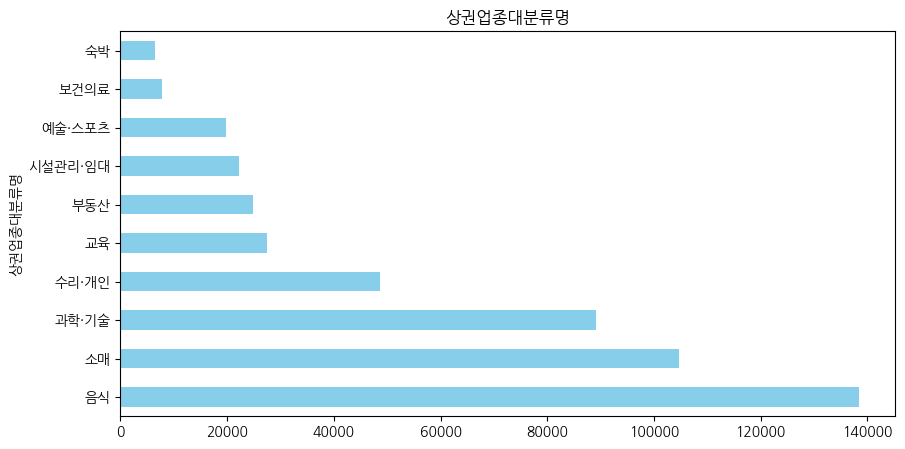

In [27]:
df1['상권업종대분류명'].value_counts().plot(kind='barh',figsize=(10,5),color='skyblue')
plt.title('상권업종대분류명')

In [28]:
# 음식점이 많은 거는 동일함

In [29]:
df1['상권업종중분류명'].value_counts()  

상권업종중분류명
한식             48386
이용·미용          28633
기타 간이          28265
섬유·의복·신발 소매    27247
부동산 서비스        24921
               ...  
병원               373
장례식장             341
통신장비 수리          310
조경·유지            108
기타 외국             46
Name: count, Length: 75, dtype: int64

In [30]:
df1['상권업종중분류명'].value_counts(1)

상권업종중분류명
한식             0.098792
이용·미용          0.058461
기타 간이          0.057710
섬유·의복·신발 소매    0.055631
부동산 서비스        0.050882
                 ...   
병원             0.000762
장례식장           0.000696
통신장비 수리        0.000633
조경·유지          0.000221
기타 외국          0.000094
Name: proportion, Length: 75, dtype: float64

<Axes: ylabel='상권업종중분류명'>

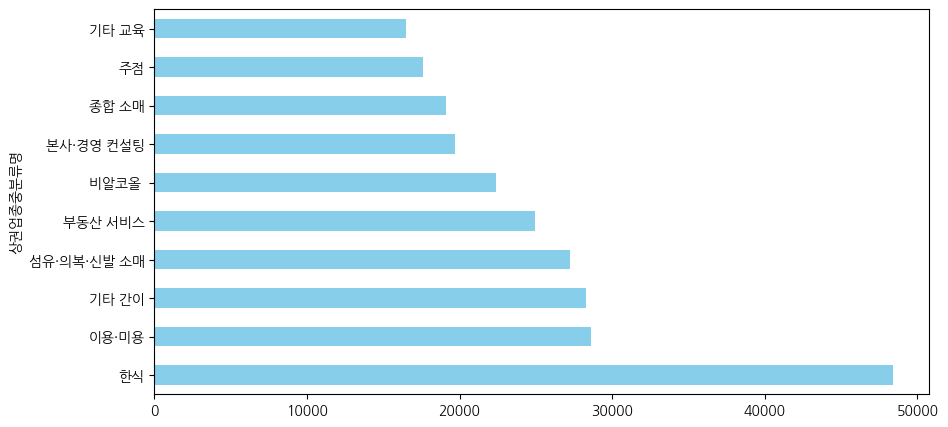

In [32]:
df1['상권업종중분류명'].value_counts()[:10].plot(kind='barh',figsize=(10,5),color='skyblue') 

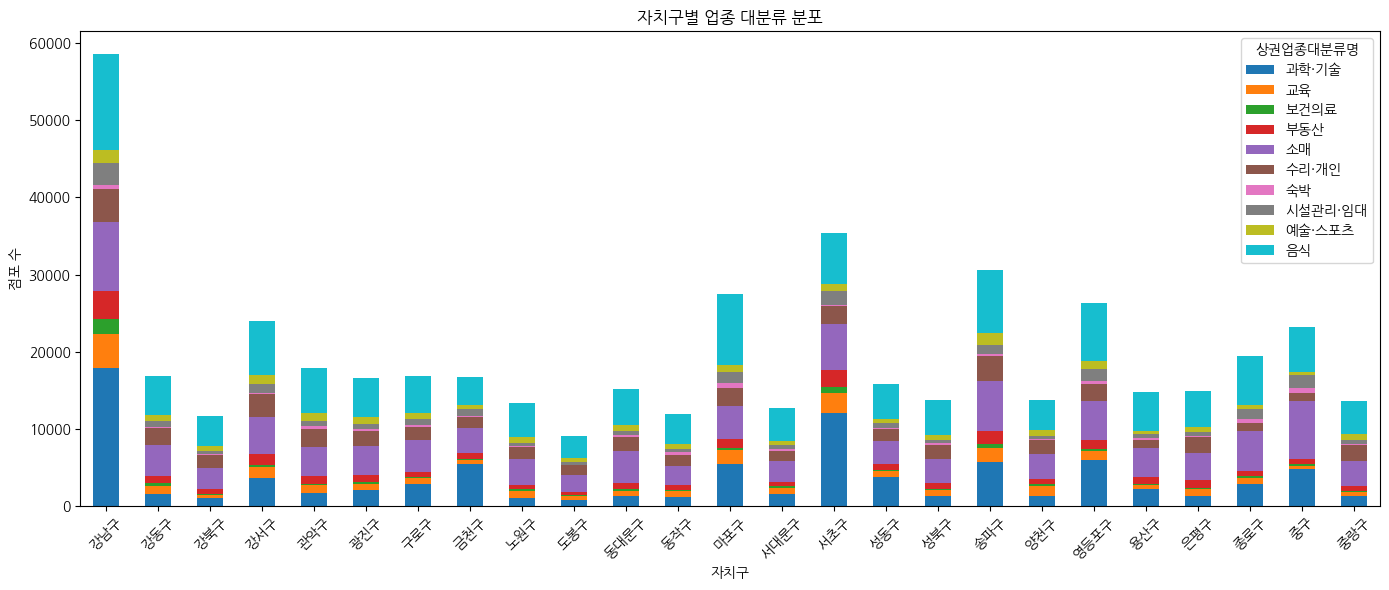

In [33]:
# 자치구별 업종 분포
gu_category_counts = df1.groupby(['시군구명', '상권업종대분류명']).size().unstack().fillna(0)

# 시각화
gu_category_counts.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("자치구별 업종 대분류 분포")
plt.ylabel("점포 수")
plt.xlabel("자치구")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
import folium
from folium.plugins import MarkerCluster

# 서울 중심으로 지도 생성
map_seoul = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

marker_cluster = MarkerCluster().add_to(map_seoul)

# 업종 필터 (예: '카페')
filtered_df = df1[df1["상권업종소분류명"] == "카페"]

for idx, row in filtered_df.iterrows():
    folium.Marker(
        location=[row["위도"], row["경도"]],
        popup=row["상호명"],
        tooltip=row["상권업종소분류명"]
    ).add_to(marker_cluster)

map_seoul.save("카페_분포지도.html")


In [39]:
from scipy.stats import entropy

# 행정동별 업종 다양성 계산
def calc_entropy(group):
    counts = group["상권업종중분류명"].value_counts()
    return entropy(counts)

entropy_by_area = df1.groupby("행정동명").apply(calc_entropy).reset_index()
entropy_by_area.columns = ["행정동명", "업종다양성지수"]
entropy_by_area.sort_values(by="업종다양성지수", ascending=False).head()


/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_985/2219489038.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  entropy_by_area = df1.groupby("행정동명").apply(calc_entropy).reset_index()


,행정동명,업종다양성지수
134,방배4동,3.652830
303,원효로2동,3.649338
120,문래동,3.647183
18,개포4동,3.646838
299,용신동,3.646239
